# Final assignment Programming 1

TODO:
- Make a concrete research question
- Inspect data
- Analyse data
- Plot data
- Statistical analysis
- Answer research question
- Write supporting document

Deliverables:
- a link to your repository with your code solution and a readme file
- the final visualization
- a document containing the data sources and the justification for the chosen methods and approaches (max 3 A4)

# Table of contents
1. [Introduction](#introduction)
2. [Data inspection](#paragraph1)
    1. [Cases dataset](#subparagraph1)
    2. [Sewagewater dataset](#subparagraph2)
    2. [Facilities dataset](#subparagraph3)
3. [Data Analysis](#paragraph2)
4. [Data Manipulation](#paragraph3)
    1. [Merging of dataframes](#subparagraph4)
5. [Visualizations](#paragraph4)
6. [Statistical Analysis](#paragraph5)
7. [Conclusion](#paragraph6)

## Introduction <a id="introduction"></a>

**Research question:** Do the amount of virus particles in sewagewater coincide with the number of postive COVID-19 cases?

**Daily COVID cases per municipality dataset:** https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

**Sewagewater dataset:** https://data.rivm.nl/covid-19/COVID-19_rioolwaterdata.csv

**Water Treatment Facilties List:** https://www.cbs.nl/-/media/_excel/2021/39/20210930-aantal-inwoners-per-verzorgingsgebied-2021.xlsx

**Retrieved dataset versions:** 2022-07-13 15:15

In [1]:
import pandas as pd             # version 2.0.1
import numpy as np              # version 1.24.3
import plotly.express as px     # version 5.14.1
import matplotlib.pyplot as plt # version 3.7.1
import seaborn as sns           # version 0.12.2

In [2]:
# loading in the data
cases = pd.read_csv('../data/COVID-19_aantallen_gemeente_per_dag.csv', sep=";")
sewagewater = pd.read_csv('../data/COVID-19_rioolwaterdata.csv', sep=";")
facilities = pd.read_excel('../data/20210930-Aantal inwoners per verzorgingsgebied 2021.xlsx', sheet_name='Tabel 1', header=0)

## Data inspection <a id="paragraph1"></a>

First we'll take a look at the structure of our datasets. The columns we have, the values they contain, the datatypes we're dealing with, the amount of entries each dataframe contains and the amount of missing values each column has.

### Cases dataset <a id="subparagraph1"></a>

Description of the variables:
- **Date_of_report:** Date and time on which the database was created by RIVM. 
- **Date_of_publication:** This concerns the number of reports per day that have newly been received by RIVM.
- **Municipality_code:** Municipality code. Municipality classification based on postcode of the place of residence of the SARS-CoV-2 positive person, coded according to CBS.
- **Municipality_name:** Name of the municipality.
- **Province:** Name of the province.
- **Security_region_code:** Security region code.
- **Security_region_name:** Name of the security region.
- **Municipal_health_service:** Name of the GGD.
- **ROAZ_region:** Name of the ROAZ region.
- **Total_reported:** The number of new persons reported to the GGD who tested positive for SARS-CoV-2 by the RIVM on [Date_of_publication].
- **Deceased:** The number of deceased persons reported to the GGDs who tested positive for SARS-CoV-2 and who were published by the RIVM on [Date_of_publication].

Metadata of the cases dataset: https://data.rivm.nl/meta/srv/eng/catalog.search;jsessionid=7E3B438E1812BD5F2AE74734A9B43230#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427

In [3]:
cases.head()

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
0,5,2022-07-13 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
1,5,2022-07-13 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0
2,5,2022-07-13 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
3,5,2022-07-13 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
4,5,2022-07-13 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0


In [4]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322524 entries, 0 to 322523
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Version                   322524 non-null  int64 
 1   Date_of_report            322524 non-null  object
 2   Date_of_publication       322524 non-null  object
 3   Municipality_code         299982 non-null  object
 4   Municipality_name         299982 non-null  object
 5   Province                  321657 non-null  object
 6   Security_region_code      320790 non-null  object
 7   Security_region_name      320790 non-null  object
 8   Municipal_health_service  321657 non-null  object
 9   ROAZ_region               316455 non-null  object
 10  Total_reported            322524 non-null  int64 
 11  Deceased                  322524 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 29.5+ MB


In [5]:
print('Shape of the dataset:', cases.shape)
print(f'Amount of missing data for each column:\n{cases.isnull().sum()}')

Shape of the dataset: (322524, 12)
Amount of missing data for each column:
Version                         0
Date_of_report                  0
Date_of_publication             0
Municipality_code           22542
Municipality_name           22542
Province                      867
Security_region_code         1734
Security_region_name         1734
Municipal_health_service      867
ROAZ_region                  6069
Total_reported                  0
Deceased                        0
dtype: int64


We can see that there are quite a lot of missing values for a couple of columns. This needs to be dealt with.

### Sewagewater Dataset <a id="subparagraph2"></a>

Description of the variables:

- **Date_of_report:** Date the file was created. (format: yyyy-mm-dd)

- **Date_measurement:** Date the sampling of the 24-hour influent (raw sewage) sample started (format: yyyy-mm-dd).

- **RWZI_AWZI_code:** Code of sewage treatment plant (rioolwaterzuiveringsinstallatie, RWZI) or waste water treatment plant (afvalwaterzuiveringsinstallatie, AWZI).

- **RWZI_AWZI_name:** Name of sewage treatment plant (WWTP) or waste water treatment plant (WWTP).

- **RNA_flow_per_100000:** The average concentration of SARS-CoV-2 RNA, converted to daily sewage flow and displayed per 100,000 inhabitants.

Metadata of the sewagewater dataset: https://data.rivm.nl/meta/srv/eng/catalog.search;jsessionid=7E3B438E1812BD5F2AE74734A9B43230#/metadata/a2960b68-9d3f-4dc3-9485-600570cd52b9

In [6]:
sewagewater.head()

,Version,Date_of_report,Date_measurement,RWZI_AWZI_code,RWZI_AWZI_name,RNA_flow_per_100000
0,2,2022-07-13,2020-03-30,32002,Tilburg,34621959326395
1,2,2022-07-13,2020-03-31,3010,Assen,41199039310795
2,2,2022-07-13,2020-03-31,1033,Garmerwolde,10473596079208
3,2,2022-07-13,2020-03-31,2011,Leeuwarden,11002680177775
4,2,2022-07-13,2020-03-31,1008,Stadskanaal,3802954816430


In [7]:
sewagewater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73374 entries, 0 to 73373
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Version              73374 non-null  int64 
 1   Date_of_report       73374 non-null  object
 2   Date_measurement     73374 non-null  object
 3   RWZI_AWZI_code       73374 non-null  int64 
 4   RWZI_AWZI_name       73374 non-null  object
 5   RNA_flow_per_100000  73374 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [8]:
print('Shape of the dataset:', sewagewater.shape)
print(f'Amount of missing data for each column:\n{sewagewater.isnull().sum()}')

Shape of the dataset: (73374, 6)
Amount of missing data for each column:
Version                0
Date_of_report         0
Date_measurement       0
RWZI_AWZI_code         0
RWZI_AWZI_name         0
RNA_flow_per_100000    0
dtype: int64


### Facilities dataset <a id="subparagraph3"></a>

- **rwzi_code:** 
- **rwzi_naam:** 
- **startdatum:** 
- **einddatum:** 
- **inwoners:** 
- **regio_type:** 
- **regio_code:** 
- **regio_naam:** 
- **aandeel:** 
- **toelichting:** 

Link to the metadata of the dataset: https://www.cbs.nl/nl-nl/maatwerk/2021/06/inwoners-per-rioolwaterzuiveringsinstallatie-1-1-2021

In [9]:
facilities.head()

,rwzi_code,rwzi_naam,startdatum,einddatum,inwoners,regio_type,regio_code,regio_naam,aandeel,toelichting
0,1008.0,STADSKANAAL,2021-01-01,2021-09-30,31755.0,GM,GM0037,Stadskanaal,1.0,voorlopig
1,1008.0,STADSKANAAL,2021-01-01,NaT,31749.0,GM,GM0037,Stadskanaal,1.0,definitief
2,1008.0,STADSKANAAL,2021-01-01,2021-09-30,31755.0,VR,VR01,Groningen,1.0,voorlopig
3,1008.0,STADSKANAAL,2021-01-01,NaT,31749.0,VR,VR01,Groningen,1.0,definitief
4,1010.0,TER APEL,2021-01-01,2021-09-30,13363.0,GM,GM1950,Westerwolde,1.0,voorlopig


In [10]:
print('Shape of the dataset:', facilities.shape)
print(f'Amount of missing data for each column:\n{facilities.isnull().sum()}')

Shape of the dataset: (2862, 10)
Amount of missing data for each column:
rwzi_code         1
rwzi_naam         1
startdatum        2
einddatum      1570
inwoners          2
regio_type        2
regio_code        2
regio_naam        2
aandeel         359
toelichting       2
dtype: int64


## Data analysis <a id="paragraph2"></a>

In [11]:
def get_timeframe(dataframe, column):
    timeframe_df = dataframe[column].copy()
    timeframe_df = timeframe_df.sort_values()
    return timeframe_df.iloc[0], timeframe_df.iloc[-1]

first, last = get_timeframe(cases,'Date_of_publication')

print(f'Timeframe of the cases dataframe: {first} till {last}')

first, last = get_timeframe(sewagewater,'Date_measurement')

print(f'Timeframe of the sewagewater dataframe: {first} till {last}')

Timeframe of the cases dataframe: 2020-02-28 till 2022-07-13
Timeframe of the sewagewater dataframe: 2020-03-30 till 2022-07-10


The timeframes seem to be fairly similar.

In [12]:
municipality_count_cases_unique = len(cases.Municipality_name.unique())
municipality_count_sewage_unique = len(sewagewater.RWZI_AWZI_name.unique())

print(f'Amount of unique municipalities that have measurements = Cases: {municipality_count_cases_unique}, Sewage: {municipality_count_sewage_unique}')

Amount of unique municipalities that have measurements = Cases: 345, Sewage: 317


We can see that the cases dataframe has a lot more measurements for each municipality and that the unique amount of municipality is similar for each dataframe.

Next up, we'll take the intersection of both dataframes to only select the municipality that are present in both.

In [13]:
# unique municipality names per dataframe
cases_municipalities_codes = cases.Municipality_code.unique()
facilities_regio_codes = facilities.regio_code.unique()

print("Cases municipality codes:", len(cases_municipalities_codes))
print("Facilities regio names:", len(facilities_regio_codes))

Cases municipality codes: 345
Facilities regio names: 378


In [14]:
# get the intersection of both dataframes
intersection = set(cases_municipalities_codes) & set(facilities_regio_codes)
intersection_str = list(map(str, intersection))

print('Intersection count:', len(intersection_str))
print('First few elements:', list(sorted(intersection_str))[:5]) # first few elements

Intersection count: 342
First few elements: ['GM0014', 'GM0034', 'GM0037', 'GM0047', 'GM0050']


In [15]:
sewage_rwzi = sewagewater['RWZI_AWZI_code'].unique()
facilities_rwzi = facilities['rwzi_code'].unique()

print("Sewagewater RWZI codes:", len(sewage_rwzi))
print("Facilities RWZI codes:", len(facilities_rwzi))

Sewagewater RWZI codes: 317
Facilities RWZI codes: 320


## Data Manipulation <a id="paragraph3"></a>

In [16]:
cases.dropna(inplace=True)
sewagewater.dropna(inplace=True)
facilities.dropna(inplace=True)

In [17]:
cases['Date_of_publication'] = pd.to_datetime(cases['Date_of_publication'])
sewagewater['Date_measurement'] = pd.to_datetime(sewagewater['Date_measurement'])

print("Data type Date_of_publication:", cases['Date_of_publication'].dtypes)
print("Data type Date_measurement:", sewagewater['Date_measurement'].dtypes)

Data type Date_of_publication: datetime64[ns]
Data type Date_measurement: datetime64[ns]


In [18]:
cases.sort_values('Date_of_publication', inplace=True)
sewagewater.sort_values('Date_measurement', inplace=True)

In [19]:
def check_if_sorted(dataframe_name, dataframe_column):
    column = dataframe_name[dataframe_column]
    is_sorted_ascending = column.is_monotonic_increasing
    is_sorted_descending = column.is_monotonic_decreasing

    if is_sorted_ascending:
        print(f"The {dataframe_column} column is sorted chronologically in ascending order.")
    elif is_sorted_descending:
        print(f"The {dataframe_column} column is sorted chronologically in descending order.")
    else:
        print(f"The {dataframe_column} column is not sorted chronologically.")

def check_if_sorted_index(dataframe_name):
    column = dataframe_name.index
    is_sorted_ascending = column.is_monotonic_increasing
    is_sorted_descending = column.is_monotonic_decreasing

    if is_sorted_ascending:
        print(f"The index is sorted chronologically in ascending order.")
    elif is_sorted_descending:
        print(f"The index is sorted chronologically in descending order.")
    else:
        print(f"The index is not sorted chronologically.")


In [20]:
check_if_sorted(cases, 'Date_of_publication')
check_if_sorted(sewagewater, 'Date_measurement')

The Date_of_publication column is sorted chronologically in ascending order.
The Date_measurement column is sorted chronologically in ascending order.


### Merging of dataframes <a id="subparagraph4"></a>

In [21]:
merged_df_sewage_facilities = pd.merge(sewagewater[['Date_measurement', 'RWZI_AWZI_code', 'RNA_flow_per_100000']],
                                       facilities[['rwzi_code', 'regio_code']],
                                       left_on=['RWZI_AWZI_code'],
                                       right_on=['rwzi_code'])

merged_df_sewage_facilities = merged_df_sewage_facilities.drop_duplicates(subset=['Date_measurement', 'RWZI_AWZI_code'])

In [22]:
merged_df_sewage_facilities

,Date_measurement,RWZI_AWZI_code,RNA_flow_per_100000,rwzi_code,regio_code
0,2020-03-30,32002,34621959326395,32002.0,GM0785
7,2020-04-06,32002,4448715679942,32002.0,GM0785
14,2020-04-13,32002,49219746494862,32002.0,GM0785
21,2020-04-20,32002,8037430756227,32002.0,GM0785
28,2020-04-27,32002,10440976813203,32002.0,GM0785
...,...,...,...,...,...
283236,2022-07-02,12024,37043390004909,12024.0,GM0361
283243,2022-07-05,12024,30692423287542,12024.0,GM0361
283250,2022-07-06,12024,46050527079072,12024.0,GM0361
283257,2022-07-09,12024,74121925163914,12024.0,GM0361


In [23]:
merged_df_sewage_facilities_cases = pd.merge(merged_df_sewage_facilities[['Date_measurement', 'RWZI_AWZI_code', 'RNA_flow_per_100000', 'rwzi_code', 'regio_code']],
                              cases[['Date_of_publication', 'Municipality_code', 'Municipality_name', 'Total_reported', 'Deceased']],
                              left_on=['regio_code', 'Date_measurement'],
                              right_on=['Municipality_code', 'Date_of_publication'])


In [24]:
merged_df_sewage_facilities_cases

,Date_measurement,RWZI_AWZI_code,RNA_flow_per_100000,rwzi_code,regio_code,Date_of_publication,Municipality_code,Municipality_name,Total_reported,Deceased
0,2020-03-30,32002,34621959326395,32002.0,GM0785,2020-03-30,GM0785,Goirle,0,0
1,2020-04-06,32002,4448715679942,32002.0,GM0785,2020-04-06,GM0785,Goirle,0,0
2,2020-04-13,32002,49219746494862,32002.0,GM0785,2020-04-13,GM0785,Goirle,2,0
3,2020-04-20,32002,8037430756227,32002.0,GM0785,2020-04-20,GM0785,Goirle,1,0
4,2020-04-27,32002,10440976813203,32002.0,GM0785,2020-04-27,GM0785,Goirle,1,0
...,...,...,...,...,...,...,...,...,...,...
65549,2021-05-31,12024,5596505134515,12024.0,GM0361,2021-05-31,GM0361,Alkmaar,4,0
65550,2021-07-08,12024,12517118257172,12024.0,GM0361,2021-07-08,GM0361,Alkmaar,19,0
65551,2022-05-08,12024,17447707020038,12024.0,GM0361,2022-05-08,GM0361,Alkmaar,9,0
65552,2022-06-19,12024,57369850122472,12024.0,GM0361,2022-06-19,GM0361,Alkmaar,22,0


In [25]:
# Print the merged DataFrame
final_df = merged_df_sewage_facilities_cases.drop(columns=['RWZI_AWZI_code', 'regio_code', 'Date_of_publication'])
final_df.set_index('Date_measurement', inplace=True)
final_df

,RNA_flow_per_100000,rwzi_code,Municipality_code,Municipality_name,Total_reported,Deceased
Date_measurement,,,,,,
2020-03-30,34621959326395,32002.0,GM0785,Goirle,0,0
2020-04-06,4448715679942,32002.0,GM0785,Goirle,0,0
2020-04-13,49219746494862,32002.0,GM0785,Goirle,2,0
2020-04-20,8037430756227,32002.0,GM0785,Goirle,1,0
2020-04-27,10440976813203,32002.0,GM0785,Goirle,1,0
...,...,...,...,...,...,...
2021-05-31,5596505134515,12024.0,GM0361,Alkmaar,4,0
2021-07-08,12517118257172,12024.0,GM0361,Alkmaar,19,0
2022-05-08,17447707020038,12024.0,GM0361,Alkmaar,9,0


In [26]:
check_if_sorted(merged_df_sewage_facilities, 'Date_measurement')
check_if_sorted(merged_df_sewage_facilities_cases, 'Date_measurement')
check_if_sorted(merged_df_sewage_facilities_cases, 'Date_of_publication')
check_if_sorted_index(final_df)

The Date_measurement column is not sorted chronologically.
The Date_measurement column is not sorted chronologically.
The Date_of_publication column is not sorted chronologically.
The index is not sorted chronologically.


In [27]:
df = final_df.sort_index()

In [28]:
df_test = df.Municipality_code.unique()
len(df_test)

159

In [29]:
value_counts = df['Municipality_name'].value_counts()
print(value_counts)

Municipality_name
Alphen aan den Rijn    1533
Alkmaar                1275
Heerenveen             1235
Súdwest-Fryslân        1224
Deventer               1205
                       ... 
Texel                   202
Heemstede               201
Huizen                  199
Haarlem                 199
Overbetuwe               44
Name: count, Length: 159, dtype: int64


In [30]:
top_municipalities = df['Municipality_name'].value_counts().head(10).index.tolist()
df_filtered = df[df['Municipality_name'].isin(top_municipalities)]

In [31]:
df_filtered

,RNA_flow_per_100000,rwzi_code,Municipality_code,Municipality_name,Total_reported,Deceased
Date_measurement,,,,,,
2020-03-31,11002680177775,2011.0,GM0080,Leeuwarden,0,0
2020-04-02,22305803791361,12022.0,GM0361,Alkmaar,5,2
2020-04-07,23485537715503,2011.0,GM0080,Leeuwarden,0,0
2020-04-08,23074020950140,12022.0,GM0361,Alkmaar,7,2
2020-04-14,1413955836963,2011.0,GM0080,Leeuwarden,0,0
...,...,...,...,...,...,...
2022-07-10,115066503292950,2019.0,GM0059,Achtkarspelen,0,0
2022-07-10,35075242801755,2029.0,GM0080,Leeuwarden,33,0
2022-07-10,73733953742043,2017.0,GM0080,Leeuwarden,33,0


In [65]:
# Convert the index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# Calculate the rolling mean for each column
rolling_mean = df[['RNA_flow_per_100000', 'Deceased', 'Total_reported']].rolling('7D').mean()

# Print the rolling mean dataframe
print(rolling_mean)


                  RNA_flow_per_100000  Deceased  Total_reported
Date_measurement                                               
2020-03-30               3.462196e+13  0.000000        0.000000
2020-03-31               3.791050e+13  0.000000        0.500000
2020-03-31               2.654132e+13  0.000000        0.333333
2020-03-31               2.265666e+13  0.000000        0.250000
2020-03-31               2.488346e+13  0.000000        0.600000
...                               ...       ...             ...
2022-07-10               1.427514e+14  0.010345       23.079310
2022-07-10               1.426458e+14  0.010333       23.055109
2022-07-10               1.427128e+14  0.010321       23.079128
2022-07-10               1.426564e+14  0.010309       23.063001
2022-07-10               1.425511e+14  0.010297       23.042334

[65554 rows x 3 columns]


## Visualizations <a id="paragraph4"></a>

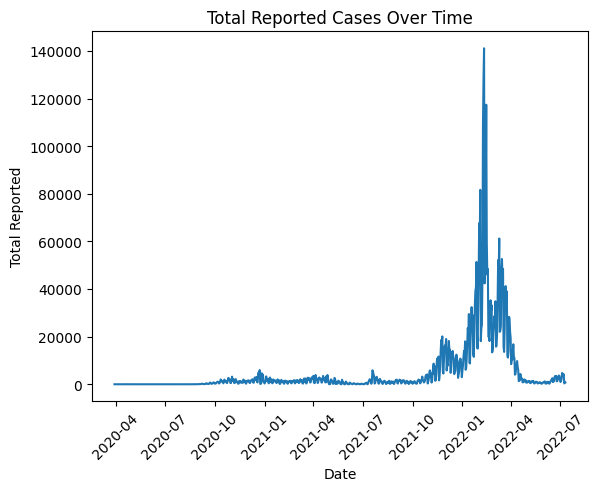

In [69]:
# Aggregate the data by date and calculate the sum of total reported cases
df_agg = rolling_mean.groupby('Date_measurement')['Total_reported'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_agg, x='Date_measurement', y='Total_reported')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Reported')
plt.title('Total Reported Cases Over Time')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


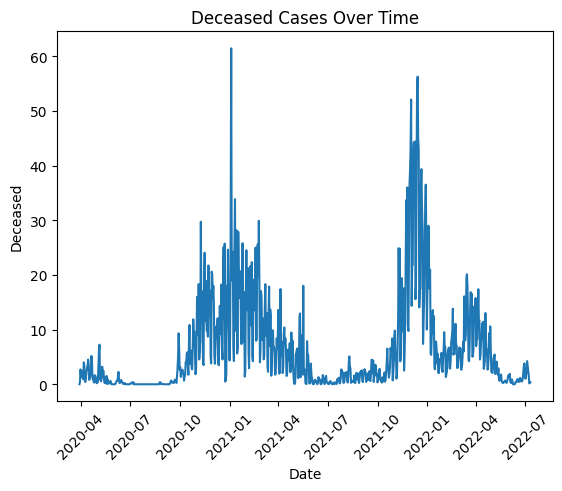

In [75]:
# Aggregate the data by date and calculate the sum of total reported cases
df_agg2 = rolling_mean.groupby('Date_measurement')['Deceased'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_agg2, x='Date_measurement', y='Deceased')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Deceased')
plt.title('Deceased Cases Over Time')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


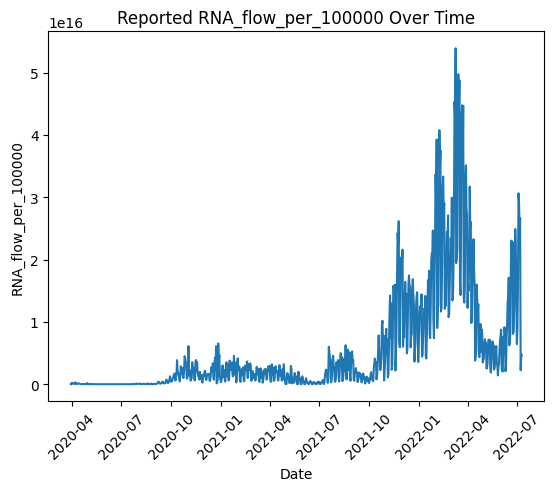

In [74]:
# Aggregate the data by date and calculate the sum of total reported cases
df_agg3 = rolling_mean.groupby('Date_measurement')['RNA_flow_per_100000'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_agg3, x='Date_measurement', y='RNA_flow_per_100000')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('RNA_flow_per_100000')
plt.title('Reported RNA_flow_per_100000 Over Time')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\Peter\AppData\Local\Temp\ipykernel_6004\666941054.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


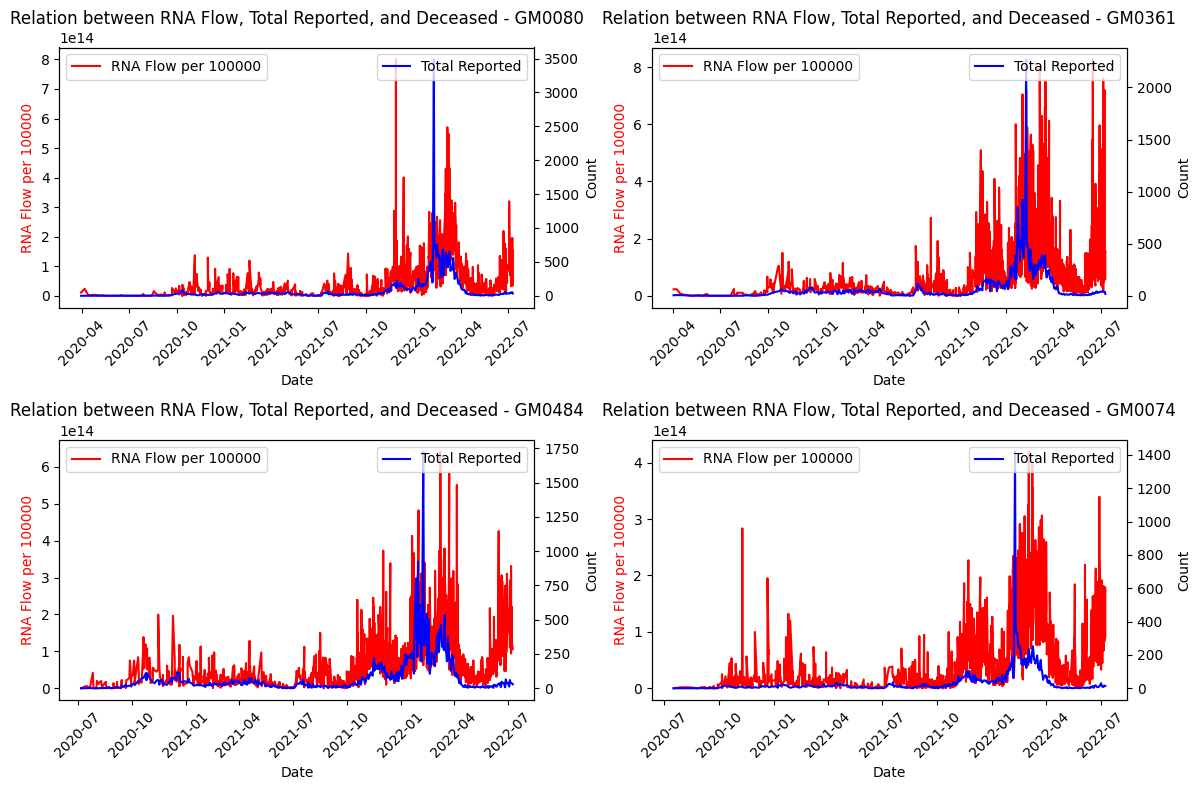

In [82]:
# Get the unique municipalities and select the first four
municipalities = df_filtered['Municipality_code'].unique()[:4]

# Create a figure and subplots with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over the selected municipalities and corresponding subplot axes
for i, (municipality, ax) in enumerate(zip(municipalities, axes.flatten())):
    # Filter the data for the current municipality
    data = df_filtered[df_filtered['Municipality_code'] == municipality]
    
    # Create a secondary y-axis for RNA flow per 100000
    ax2 = ax.twinx()
    
    # Plot RNA flow per 100000 on the secondary y-axis (red line)
    ax.plot(data.index, data['RNA_flow_per_100000'], label='RNA Flow per 100000', color='red')
    ax.set_ylabel('RNA Flow per 100000', color='red')
    
    # Plot Total reported and Deceased on the primary y-axis (blue line)
    ax2.plot(data.index, data['Total_reported'], label='Total Reported', color='blue')
    ax2.set_ylabel('Count')
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_title(f'Relation between RNA Flow, Total Reported, and Deceased - {municipality}')

    # Rotate the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Display the legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Testing

In [36]:
unique_values = cases[['Municipality_code', 'Municipality_name']].drop_duplicates()
unique_values

,Municipality_code,Municipality_name
0,GM0014,Groningen
235,GM0880,Wormerland
234,GM0879,Zundert
233,GM0873,Woensdrecht
232,GM0867,Waalwijk
...,...,...
112,GM0383,Castricum
109,GM0375,Beverwijk
114,GM0385,Edam-Volendam
115,GM0388,Enkhuizen


In [38]:
found_cases = cases[cases['Municipality_code'] == 'GM0014']
found_facilities = facilities[facilities['regio_code'] == 'GM1730']
found_facilities2 = facilities[facilities['regio_code'] == 'GM0014']
# found_cases
print(found_facilities.head(10),found_facilities2.head(10))

      rwzi_code rwzi_naam startdatum  einddatum  inwoners regio_type   
298      3010.0     ASSEN 2021-01-01 2021-09-30   76264.0         GM  \
345      3030.0     EELDE 2021-01-01 2021-09-30   55907.0         GM   
355      3031.0    GIETEN 2021-01-01 2021-09-30   31336.0         GM   
2491    33001.0    FOXHOL 2021-01-01 2021-09-30   29859.0         GM   

     regio_code regio_naam  aandeel toelichting  
298      GM1730   Tynaarlo   0.0014   voorlopig  
345      GM1730   Tynaarlo   0.4051   voorlopig  
355      GM1730   Tynaarlo   0.0010   voorlopig  
2491     GM1730   Tynaarlo   0.3750   voorlopig         rwzi_code    rwzi_naam startdatum  einddatum  inwoners regio_type   
58       1033.0  GARMERWOLDE 2021-01-01 2021-09-30  237055.0         GM  \
339      3030.0        EELDE 2021-01-01 2021-09-30   55907.0         GM   
2487    33001.0       FOXHOL 2021-01-01 2021-09-30   29859.0         GM   

     regio_code regio_naam  aandeel toelichting  
58       GM0014  Groningen   0.9748   

In [39]:
test_db2 = facilities[['regio_naam','rwzi_code']].drop_duplicates()
test_db2[test_db2["regio_naam"] == 'Groningen']

,regio_naam,rwzi_code
2,Groningen,1008.0
6,Groningen,1010.0
10,Groningen,1011.0
14,Groningen,1024.0
20,Groningen,1025.0
26,Groningen,1026.0
32,Groningen,1027.0
38,Groningen,1028.0
44,Groningen,1029.0
52,Groningen,1030.0
